In [53]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
Bg=50e9
Bsk = 1e5
Bf = 2.18e9
Gsk = 63.5e6 #Pa
n = 0.427
D = Bg*(1+n*(Bg/Bf-1))
C = Bg*(Bg -Bsk)/(D-Bsk)
H = Bsk +4*Gsk/3 + (Bg-Bsk)*(Bg-Bsk)/(D-Bsk)
M = Bg*Bg/(D-Bsk)

f = np.linspace(0,100000, num=30000) #frequency Hz
omega = 2*np.pi*f # angular frequncy


#K = 1e-11 # absolute hydraulic conductivity m2  (1darcy=10e-12)

rho_g = 2630 # grain density kg/m3
rho_f = 1000 # fluid density kg/m3
nu = 0.001 # Pa.s water viscosity at room temperature 10e-3

n = 0.424  # porosity
alpha = 1.67# tortuosity factor
kh=0.012e-2 #m/s hydraulic conductivity
a = 0.12e-4# pore size parameter m
a2 = a*a

rho_mix= (1-n)*rho_g + n*rho_f
g = 9.81 #m/s2 gravity

K = nu*kh/rho_f/g

In [54]:
# hydraulic conductivity m/s

kh = g*rho_f*K/nu
kh

0.00012000000000000002

In [55]:
dseta = np.sqrt(omega*a2*rho_f/nu)

Bes_arg = dseta*np.exp(-1j*np.pi/4) #argument der Besselfunktion in T
J1=sp.jv(1,Bes_arg) # Besselfunktion 1. Ordnung
J0=sp.jv(0,Bes_arg) # Besselfunktion 0. Ordnung
Jdiv=J1/J0
T = np.exp(1j*3*np.pi/4)*Jdiv

<IPython.core.display.Javascript object>


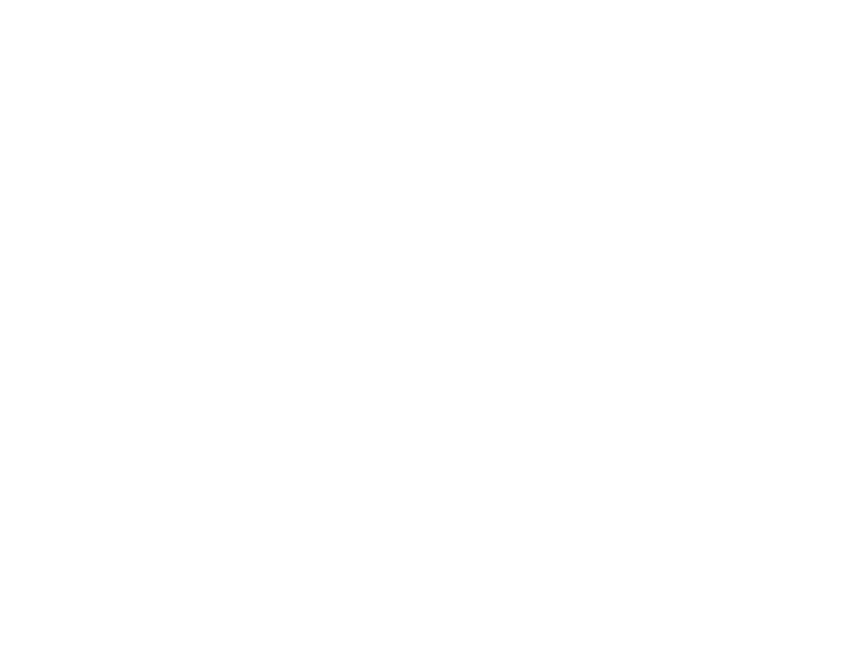

In [56]:
%matplotlib notebook
fig = plt.figure()
#ax1 = plt.subplot(311)
#ax1.plot(dseta)
ax2 = plt.subplot(211)
ax2.plot(T.real)
ax3 = plt.subplot(212)
ax3.plot(T.imag)

C:\Users\Taisiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Taisiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


<IPython.core.display.Javascript object>


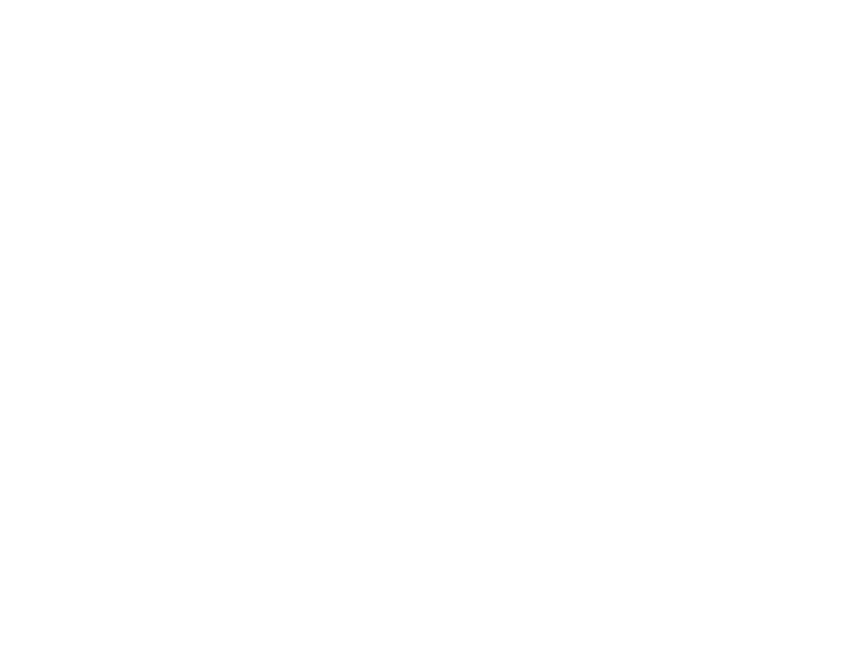

In [57]:
F1 = dseta*T/4
F2 = dseta*T/4/(1+2j*T/dseta)
denom = (1+2j*T/dseta)
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
#ax1 = plt.subplot(311)
#ax1.plot(dseta)
ax2 = plt.subplot(111)
ax2.plot(F1.real)
ax2.plot(F2.real, 'r')
#ax2.plot(denom, 'g')
#ax3 = plt.subplot(212)
#ax3.plot(F1.imag)

<IPython.core.display.Javascript object>


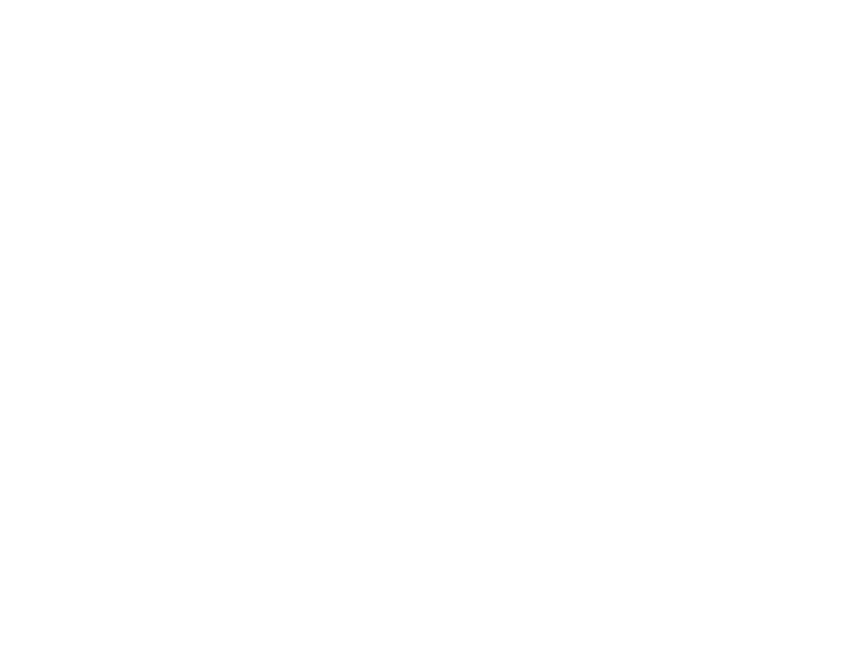

In [58]:
q1 = alpha*rho_f/n
q2 = 1j*nu*F2/omega/K
q = q1 - q2

%matplotlib notebook
fig3 = plt.figure()
ax = plt.subplot(211)
ax.semilogx(q.real)
ax = plt.subplot(212)
ax.semilogx(q.imag)

C:\Users\Taisiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


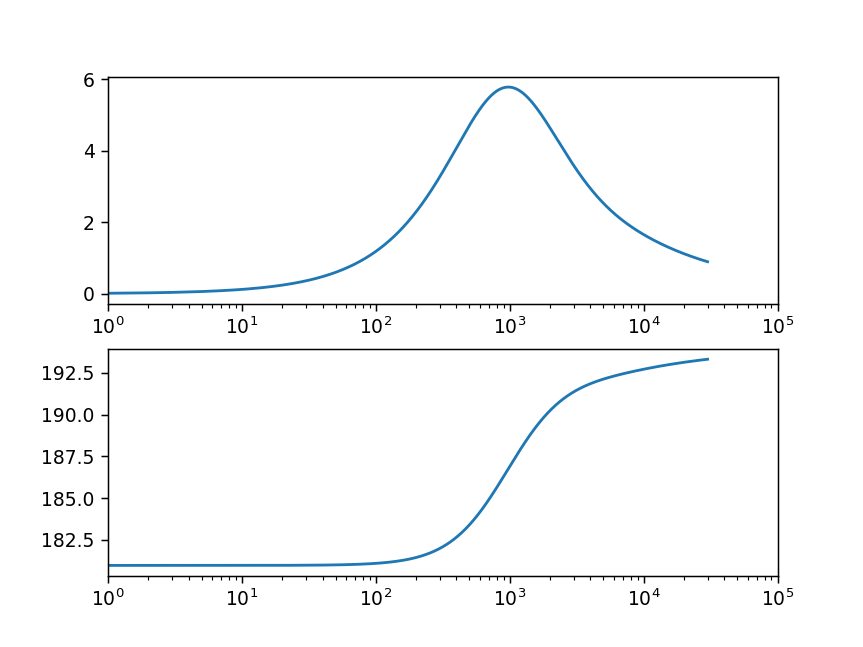

(1.0, 100000)

In [64]:
Vs2 = Gsk*q/(rho_mix*q - rho_f*rho_f)

Vs = np.sqrt(Vs2)
%matplotlib notebook
fig = plt.figure()
ax = plt.subplot(211)
ax.semilogx(Vs.imag)
plt.xlim((0,100000))
ax2= plt.subplot(212)
ax2.semilogx(Vs.real)
plt.xlim((0,100000))


In [60]:
#characteristic frequency
fc=n*nu/2/np.pi/rho_f/K
fc

5516.628637451276

<IPython.core.display.Javascript object>


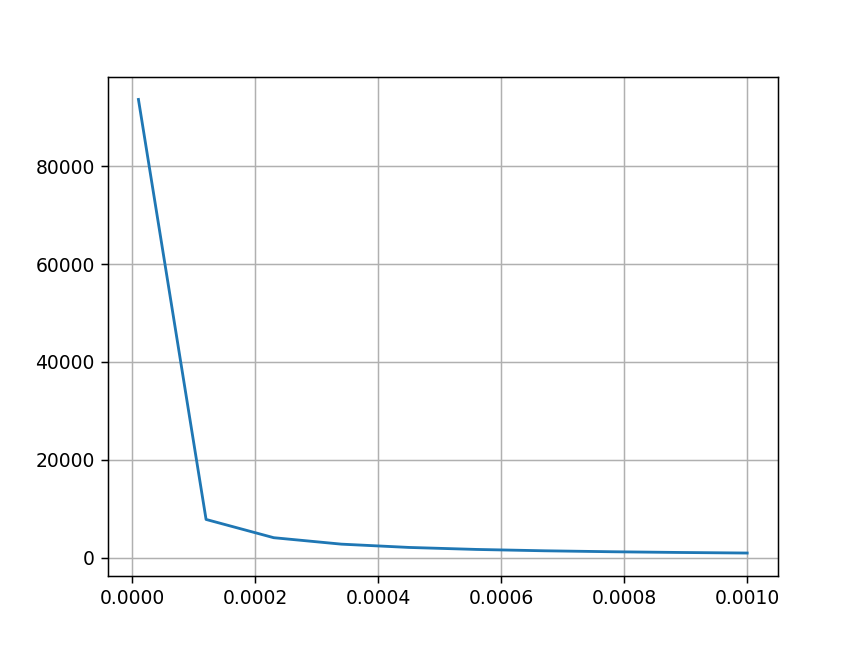

In [61]:
kh_lin= np.linspace(1e-5, 1e-3, 10)
n=0.6
fc_lin=n*g/2/np.pi/kh_lin

%matplotlib notebook
fig = plt.figure() 
ax = plt.subplot(111)
ax.plot(kh_lin, fc_lin)
ax.grid(True)

In [62]:
#characteristic frequency
n_lin = np.linspace(0.01,0.5,100)
kh_lin = np.linspace(5e-5, 5e-3, 100)
fc_ar = n_lin*g/2/np.pi
fc_ar.size

#z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])
#for k in kh_lin:
fc_long = np.array ([fc_ar/k for k in kh_lin])
#fc_long

<IPython.core.display.Javascript object>


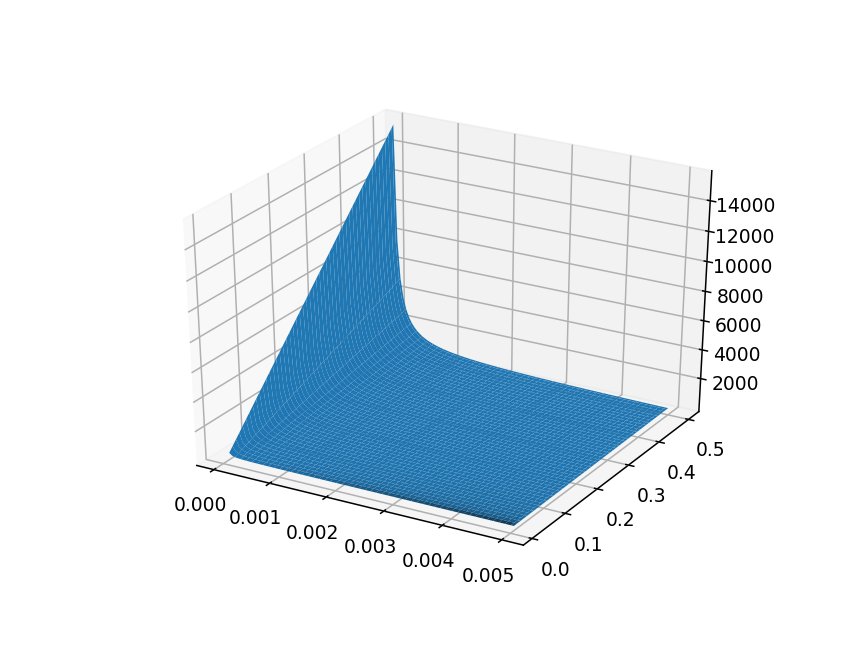

In [63]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LightSource

x,y = np.meshgrid(n_lin, kh_lin)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ls = LightSource(270, 45)
surf = ax.plot_surface(y, x, fc_long)#, rstride=1, cstride=1, facecolors=rgb)#,linewidth=0, antialiased=False, shade=False)
plt.show()